## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [1]:
import numpy as np
from scipy.special import comb
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

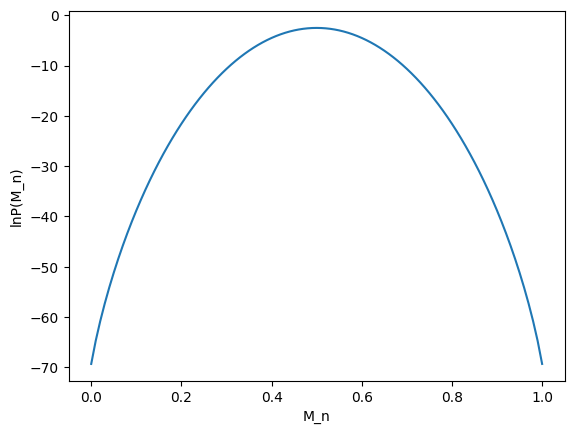

In [2]:
# This script is used to generate a plot of the binomial distribution

#return all the x values from 0 to 1 in n steps
def generateXVals(n):
    return np.linspace(0, 1, n+1)

#calculate the corresponding y values(Probabilities) for the x values
def generateYVals(n, xvals, p=0.5):
    if type(xvals) == float:
        xvals = [xvals]
    return np.array([comb(n, n*x) * (p**(n*x)) * ((1-p)**(n-n*x)) for x in xvals])

def plot(yvals, xvals):
    plt.plot(xvals, yvals)
    plt.xlabel('M_n')
    plt.ylabel('lnP(M_n)')
    plt.show()

if __name__ == "__main__":
    n = 100
    xvals = generateXVals(n)
    yvals = generateYVals(n, xvals)
    plot(np.log(yvals), xvals)

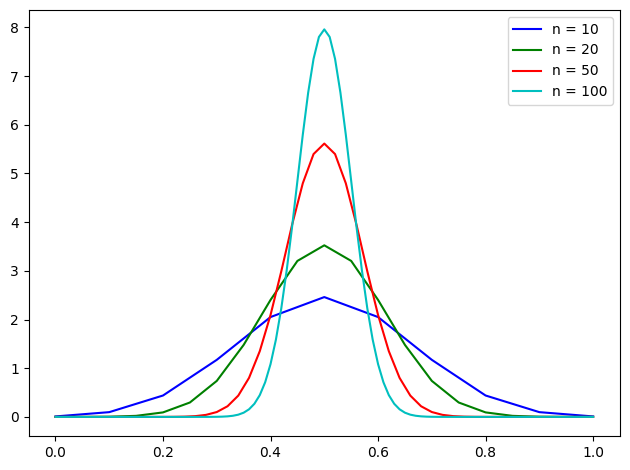

In [3]:
# plot of lnP vs M_n for different n values
if __name__ == "__main__":
    colors = ['b', 'g', 'r', 'c']
    for idx, n in enumerate([10,20,50,100]):
        xvals = generateXVals(n)
        yvals = n*generateYVals(n, xvals)
        plt.plot(xvals, (yvals), color=colors[idx], label=f'n = {n}')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * np.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**

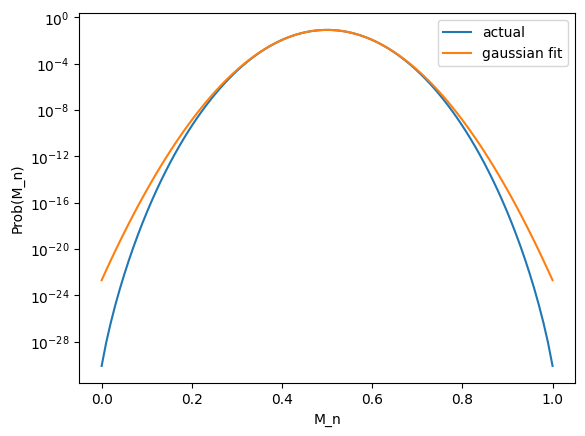

In [5]:
xvals = np.linspace(0, 1, 100)
yvals = generateYVals(100, xvals)
popt, _ = curve_fit(gaussian, xvals, yvals)
yfit = gaussian(xvals, *popt)

plt.semilogy(xvals, yvals, label='actual')
plt.semilogy(xvals, yfit, label='gaussian fit')
plt.legend()
plt.xlabel('M_n')
plt.ylabel('Prob(M_n)')
plt.show()

## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

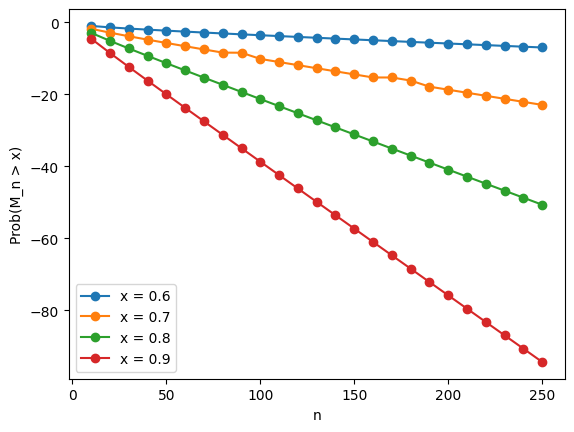

In [6]:
xstart = [0.6, 0.7, 0.8, 0.9]
nvals = np.arange(10, 251, 10)
yprobs = np.array([])

def probability_greater_than_x(x, n, p=0.5):
    return np.sum([comb(n, x) * (p**(x)) * ((1-p)**(n-x)) for x in np.arange(int(n*x), n+1)])

for x in xstart:
    yvals = [np.log(probability_greater_than_x(x, n)) for n in nvals]
    yprobs = np.append(yprobs, yvals)
    plt.plot(nvals, yvals, marker='o', label=f'x = {x}')  
plt.title('Probability of M_n > x')
plt.legend()
plt.xlabel('n')
plt.ylabel('Prob(M_n > x)')
plt.show()

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

/tmp/ipykernel_356309/911452112.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(straight_line, nvals, yvals)


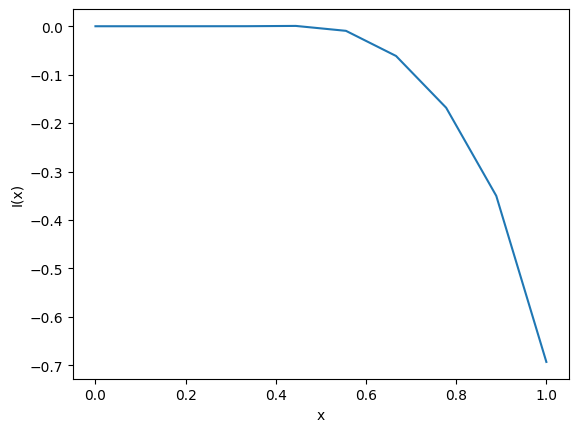

In [7]:
def straight_line(x, m, c):
    return m*x + c

xstart = np.linspace(0,1,10)
nvals = np.arange(10, 251, 10)
Ivals = np.array([])

def probability_greater_than_x(x, n, p=0.5):
    #return the probability that M_n > x for a given n and x
    return np.sum([comb(n, x) * (p**(x)) * ((1-p)**(n-x)) for x in np.arange(int(n*x), n+1)])

for x in xstart:
    yvals = [np.log(probability_greater_than_x(x, n)) for n in nvals]
    # Fit the data to a straight line
    popt, _ = curve_fit(straight_line, nvals, yvals)
    # append the slopes 
    Ivals = np.append(Ivals, popt[0])
plt.title('I(x) vs x')
plt.plot(xstart, Ivals)
plt.xlabel('x')
plt.ylabel('I(x)')
plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


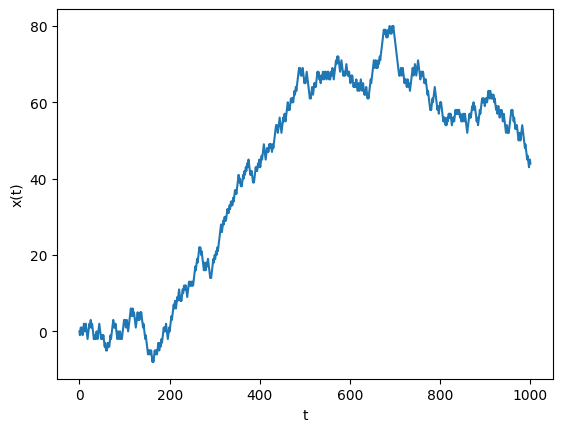

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0])

for t in np.arange(1, 1001):
    x = np.append(x, x[t-1] + (1 if np.random.choice(['H', 'T']) == 'H' else -1))
    
plt.title('Random Walk')
plt.plot(np.arange(1001), x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

<x(t)> at t=1000: -0.12
<x^2(t)> at t=1000: 977.816


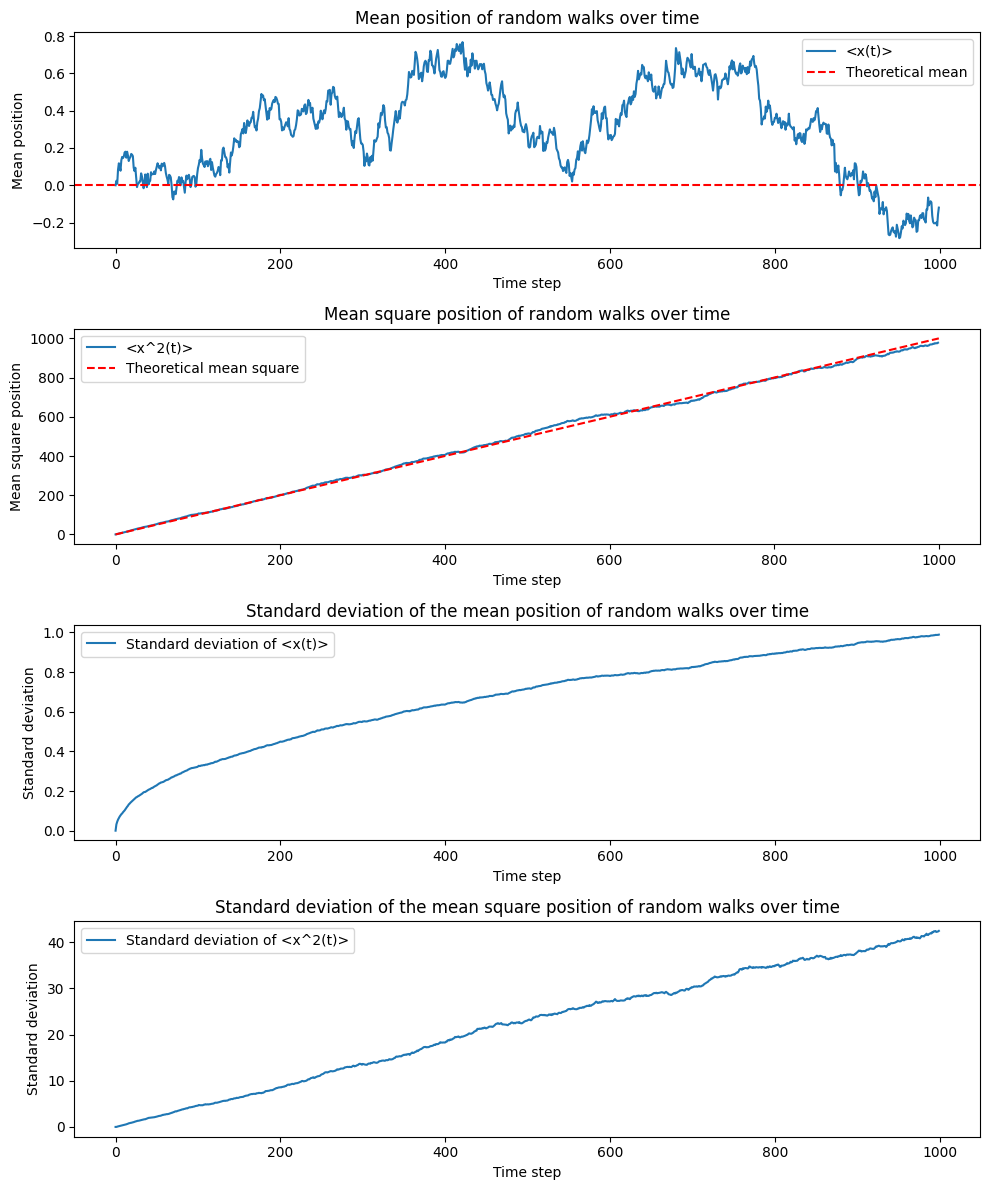

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# random walk function
t = 1000
n = 1000
walks = np.zeros((n, t)) # 1000 random walks of 1000 steps, walks are the rows and steps are the columns
for i in np.arange(n): #walks
    for ti in np.arange(1, t): #steps
        walks[i, ti] = walks[i, ti-1] + (1 if np.random.choice(['H', 'T']) == 'H' else -1)

# Compute <x(t)> and <x^2(t)>
mean_x_t = np.mean(walks, axis=0)
mean_x2_t = np.mean(walks**2, axis=0)

# 1. <x(t)> would be 0 for a symmetric random walk because the walker has equal probability to move left or right at each step.
# Therefore, the expected position at any time step is 0.
print(f"<x(t)> at t={t}: {mean_x_t[-1]}")

# 2. <x^2(t)> would be t for a symmetric random walk. This is because the variance of a symmetric random walk is t, 
# and for a random walk starting at 0, the variance is equal to the mean of the square of the position.
print(f"<x^2(t)> at t={t}: {mean_x2_t[-1]}")

fig, axs = plt.subplots(4, figsize=(10, 12))

# Plot <x(t)>
axs[0].plot(mean_x_t, label='<x(t)>')
axs[0].axhline(0, color='r', linestyle='--', label='Theoretical mean')
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Mean position')
axs[0].legend()
axs[0].set_title('Mean position of random walks over time')

# Plot <x^2(t)>
axs[1].plot(mean_x2_t, label='<x^2(t)>')
axs[1].plot(np.arange(1001), np.arange(1001), color='r', linestyle='--', label='Theoretical mean square')
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Mean square position')
axs[1].legend()
axs[1].set_title('Mean square position of random walks over time')

# 3. The 'error' of the calculation could be computed as the standard deviation of the mean and mean square position at each time step.
# This gives a measure of the statistical deviation of the mean and mean square position from the expected mean and mean square position.
# The error for the mean value of x(t) variates from the expected value of 0 by a value of +-1 which is permissible for a random walk. 
# The error for the mean square value of x(t) variates from the expected value of t by a value of +-sqrt(t) which is also permissible for a random walk.
error_x_t = np.std(walks, axis=0) / np.sqrt(n)
error_x2_t = np.std(walks**2, axis=0) / np.sqrt(n)

axs[2].plot(error_x_t, label='Standard deviation of <x(t)>')
axs[2].set_xlabel('Time step')
axs[2].set_ylabel('Standard deviation')
axs[2].legend()
axs[2].set_title('Standard deviation of the mean position of random walks over time')

axs[3].plot(error_x2_t, label='Standard deviation of <x^2(t)>')
axs[3].set_xlabel('Time step')
axs[3].set_ylabel('Standard deviation')
axs[3].legend()
axs[3].set_title('Standard deviation of the mean square position of random walks over time')

plt.tight_layout()
plt.show()


## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

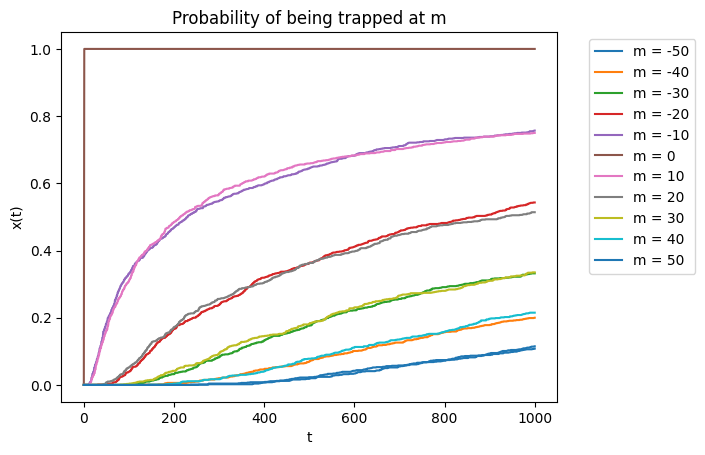

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def trapped_walk(m, n=1000, t=1000, p=0.5):
    # m is where the trap is at, n is the number of walks, t is steps, p is the probability of heads
    sample_of_walks = np.zeros((n, t+1))
    for i in np.arange(n):
        for step in np.arange(1, t+1):  # start from 1 because the 0th step is already 0
            sample_of_walks[i, step] = sample_of_walks[i ,step-1]
            if sample_of_walks[i, step] == m:
                sample_of_walks[i, step:] = m
                break
            sample_of_walks[i, step] += (1 if np.random.choice(['H', 'T'], p=[p, 1-p]) == 'H' else -1)
    return sample_of_walks
    
def trapped_walk_probability(m, n=1000, t=1000, p=0.5):
    probabilty_matrix = np.zeros((n, t+1))
    for i in np.arange(n):
        current = 0
        for step in np.arange(1, t+1):
            if current == m:
                probabilty_matrix[i, step:] = 1
                break
            current += (1 if np.random.choice(['H', 'T'], p=[p, 1-p]) == 'H' else -1)
    return np.mean(probabilty_matrix, axis=0)
    
traps = np.arange(-50, 51, 10)
n = 1000  # number of walks
sample_of_walks_probability = np.array([trapped_walk_probability(int(m), n) for m in traps])

for idx, m in enumerate(traps):
    plt.plot(sample_of_walks_probability[idx], label=f'm = {m}')
plt.title('Probability of being trapped at m')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def trapped_walk(m, n=1000, t=1000, p=0.5):
    # m is where the trap is at, n is the number of walks, t is steps, p is the probability of heads
    sample_of_walks = np.zeros((n, t+1))
    for i in np.arange(n):
        for step in np.arange(1, t+1):  # start from 1 because the 0th step is already 0
            sample_of_walks[i, step] = sample_of_walks[i ,step-1]
            if sample_of_walks[i, step] == m:
                sample_of_walks[i, step:] = m
                break
            sample_of_walks[i, step] += (1 if np.random.choice(['H', 'T'], p=[p, 1-p]) == 'H' else -1)
    return sample_of_walks

traps = np.arange(-50, 51, 10)
n = 1000  # number of walks

plt.figure(figsize=(10, 6))
for m in traps:
    sample_of_walks = trapped_walk(m=int(m),n=300)
    plt.plot(np.mean(sample_of_walks, axis=0), label=f'm = {m}')

plt.title('Trapped random walks')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

In task 2, we have computed the probability of P(M_n>x) for a fair coin. This basically means that we are trying to find the probabiltity that we get heads n * x number of times at the very least (n is the total number of Bernoulli's Trials/Coin Tosses). In Task 6, we are trying to find the probability that a random walker reaches the trap at x=M at time t. This is also a probability problem, such that we are basically saying what is the probability that we reach the trap at x=M at least one. In the Coin Toss problem, if we get heads n * x number of times, we can assume it to behave like a trap, and in the Random Walk with a trap problem, we are trying to find the probability that we reach the trap at x=M at least once. 
The rate of reaching the trap in Task-6 varies with the number of steps taken, and the probability of getting heads n * x number of times in Task-2 also varies with the number of coin tosses. Hence, the relationship between the two problems is that they are both affected by the number of steps taken along with the position of x (trap or number of heads).